In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
type(iris)
df = pd.DataFrame(iris.data, columns=['sepal_length_(cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal_length_(cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
species = []
for i in range(150):
    if i < 50:
        species.append('Iris-setosa')
    elif i > 49 and i < 100:
        species.append('Iris-versicolor')
    else:
         species.append('Iris-virginica')
         
df['species'] = species

In [5]:
df.columns = [col.replace(' ', '_')for col in df.columns]

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length_(cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width_(cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length_(cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width_(cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
df.shape

(150, 5)

In [8]:
df.shape[0]

150

In [9]:
x_min, x_max = df['petal_length_(cm)'].min() - 5, df['petal_length_(cm)'].max() + 5

In [10]:
y_min, y_max = df['petal_width_(cm)'].min() - 5, df['petal_width_(cm)'].max() + 5

In [11]:
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

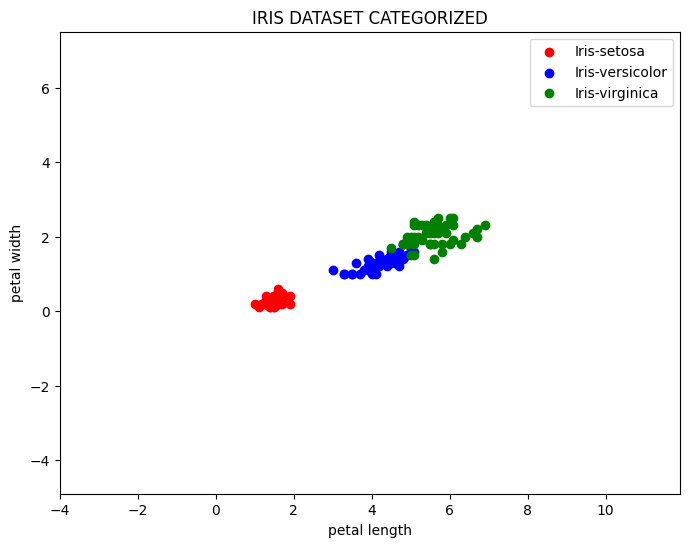

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
for key, group in df.groupby(by='species'):
    plt.scatter(group['petal_length_(cm)'], group['petal_width_(cm)'], 
                c=colors[key], label=key)
ax.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("IRIS DATASET CATEGORIZED")
 
plt.show()

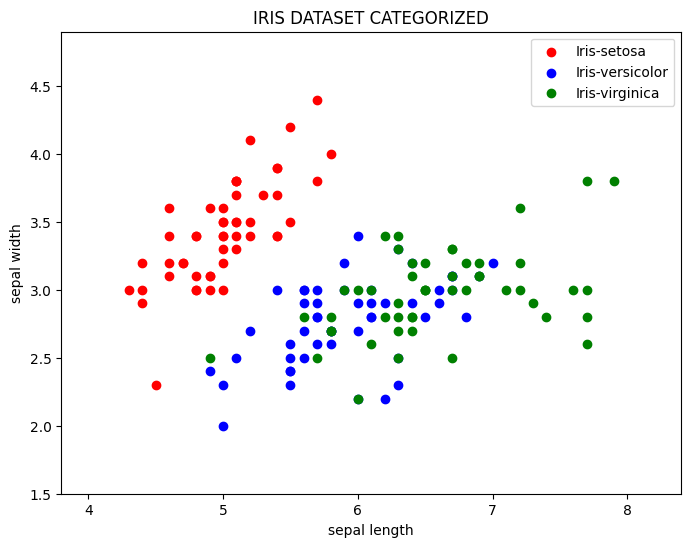

In [13]:
x_min, x_max = df['sepal_length_(cm)'].min() - .5, df['sepal_length_(cm)'].max() + .5
y_min, y_max = df['sepal_width_(cm)'].min() - .5, df['sepal_width_(cm)'].max() + .5
 
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
 
fig, ax = plt.subplots(figsize=(8, 6))
 
for key, group in df.groupby(by='species'):
    # funkcja scatter przyjmuje argumenty - współrzędne X punktów, współrzędne Y punktów,
    # kolor i nazwę rysowanej grupy
    plt.scatter(group['sepal_length_(cm)'], group['sepal_width_(cm)'], 
                c=colors[key], label=key)
 
ax.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("IRIS DATASET CATEGORIZED")
 
plt.show()

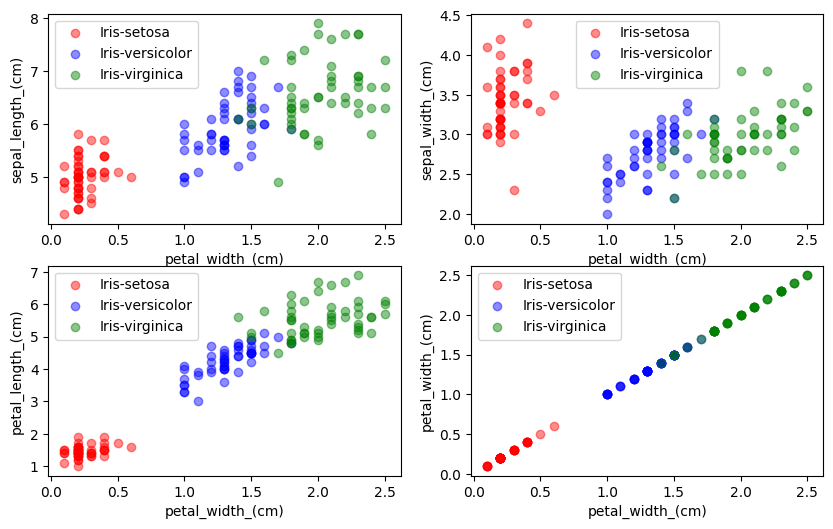

In [14]:
# utwórz wykres składający się z 4 małych wykresów
fig, ax = plt.subplots(2,2,figsize=(10, 6))
 
# aktualnie rysowanie odbędzie się w określonym pod-wykresie
plt_position = 1
 
# obrazujemy zależność miedzy tą zmienną, a pozostałymi cechami próbek
feature_x= 'petal_width_(cm)'
 
# dla każdej cechy opisującej kwiaty
for feature_y in df.columns[:4]:
 
    # wybierz kolejny pod wykres
    plt.subplot(2, 2, plt_position) 
 
    # i rysuj osobne wykresy dla każdego gatunku (te 3 rysowane tu wykresy
    # nakładają sie na siebie, co pozwala automatycznie generować legendę)
    for species, color in colors.items():
        # podczas rysowanie należy odfiltrować tylko kwiaty jednego gatunku
        # zobacz jak filtrować dane. Służy do tego funkcja loc wywoływana dla data frame
        # wyrażenie w nawiasie kwadratowym ma zwracać True/False. Zwrócone będą wiersze,
        # gdzie wyrażenie ma wartość True. Po przecinku znajduje się nazwa kolumny, która ma być zwrócona
        plt.scatter(df.loc[df['species']==species, feature_x],
                    df.loc[df['species']==species, feature_y],
                    label=species,
                    alpha = 0.45, # transparency
                    color=color)
 
    # opisujemy wykres
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt_position += 1
 
plt.show()

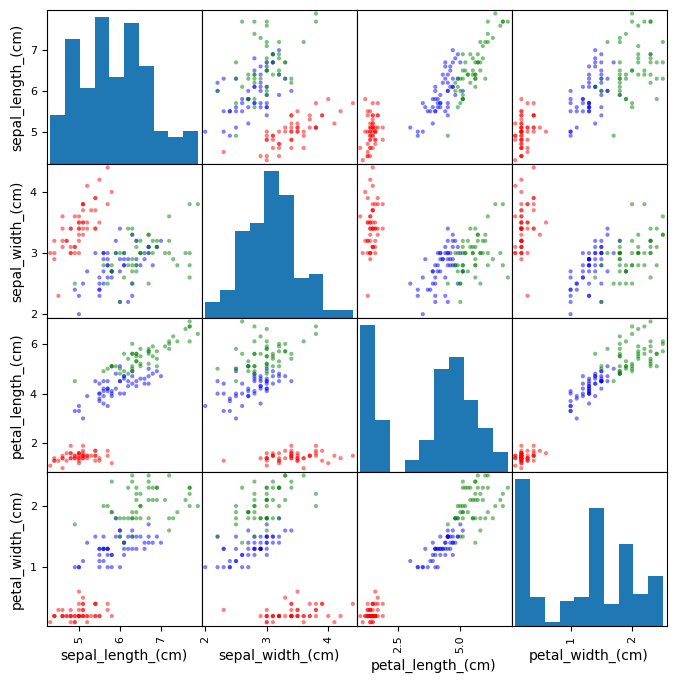

In [15]:
# Zamiast analizować każdą parę niezależnie można generować tzw. scatter matrix,
# czyli gotową macierz z wykresami dla każdej pary właściwości
# tutaj wykorzystujemy funkcję scatter_matrix zaimplementowaną w pandas...
# Do wyznaczenia koloru skorzystaliśmy z funkcji apply. Pozwala ona wywołać prostą funkcję na rzecz
# każdego wiersza z data frame lub serii danych
pd.plotting.scatter_matrix(df, figsize=(8, 8), 
                           color = df['species'].apply(lambda x: colors[x]));
plt.show()

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


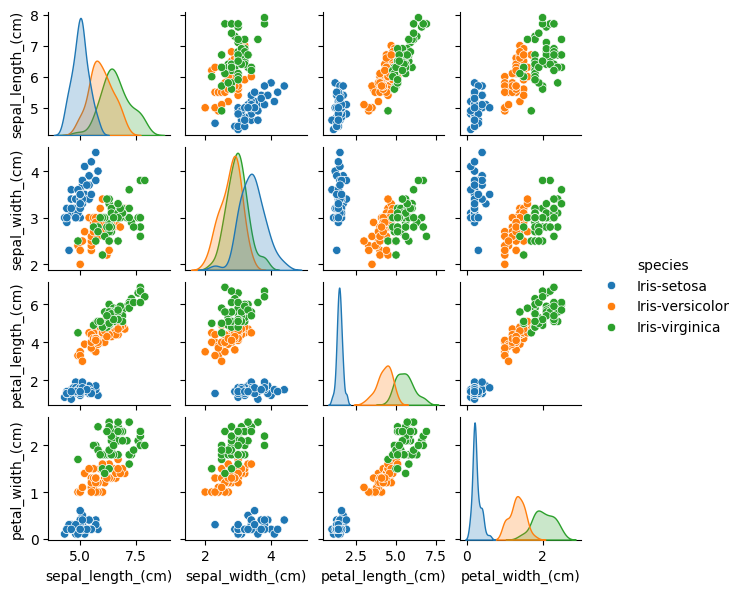

In [19]:
# ... a tutaj podobny wykres generowany przez funkcję pairplot z modułu seaborn
import seaborn as sns
_ = sns.pairplot(df, hue="species", height=1.5)

In [24]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :4] # X  (lub X_train) to znane cechy próbki
y = df.loc[:, 'species'] # y (lub y_train) to przypisane tym próbkom etykiety

categories = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
y = y.apply(lambda x: categories[x])

X.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [26]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.9303939218549564

In [27]:
iris_1 = [5, 3.5, 1.4, 0.2]
iris_2 = [6.4, 3, 4.5, 1]
iris_3 = [6, 3, 5, 2]
other = [1, 2, 3, 4]

flowers = [iris_1, iris_2, iris_3, other]

species_predict = lr.predict(flowers)
print(species_predict)

[0.92864122 1.988214   2.75655091 4.11737372]


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# zmiana wartości ciągłych na dyskretne (ciągłe to np. cena, pojemność akumulatora itp.)
# dyskretne to takie, którym da się przypisać konkretne kategorie np. oceny w szkole
for f, s in zip(flowers, species_predict):
    if round(s) == 1:
        print(f'Flower {f} is Iris-setosa')
    elif round(s) == 2:
        print(f'Flower {f} is Iris-versicolor')
    elif round(s) == 3:
        print(f'Flower {f} is Iris-virginica')
    else:
        print(f'Flower {f} is unknown')        

Flower [5, 3.5, 1.4, 0.2] is Iris-setosa
Flower [6.4, 3, 4.5, 1] is Iris-versicolor
Flower [6, 3, 5, 2] is Iris-virginica
Flower [1, 2, 3, 4] is unknown
